In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##### Creating backup copy

In [6]:
backup=car.copy()

## Cleaning Data 

#### year has many non-year values

In [7]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [8]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [9]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [10]:
car['Price']=car['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [11]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [12]:
car=car[car['kms_driven'].str.isnumeric()]

In [13]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [14]:
car=car[~car['fuel_type'].isna()]

In [15]:
car.shape

(816, 6)

In [16]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [17]:
car=car.reset_index(drop=True)

## Cleaned Data

In [18]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


## Exploratory Data Analysis — Correlation & Hypothesis Tests

Below we compute numeric summaries, correlation matrices, and run statistical tests (ANOVA + Tukey HSD, Chi-square) to support claims about differences/associations.
We group very-rare companies into 'Other' for stability of tests.

,Price,year,kms_driven
count,8.160000e+02,816.000000,816.000000
mean,4.117176e+05,2012.444853,46275.531863
std,4.751844e+05,4.002992,34297.428044
min,3.000000e+04,1995.000000,0.000000
25%,1.750000e+05,2010.000000,27000.000000
50%,2.999990e+05,2013.000000,41000.000000
75%,4.912500e+05,2015.000000,56818.500000
max,8.500003e+06,2019.000000,400000.000000



Pearson correlation:
               Price      year  kms_driven
Price       1.000000  0.287193   -0.120854
year        0.287193  1.000000   -0.233695
kms_driven -0.120854 -0.233695    1.000000


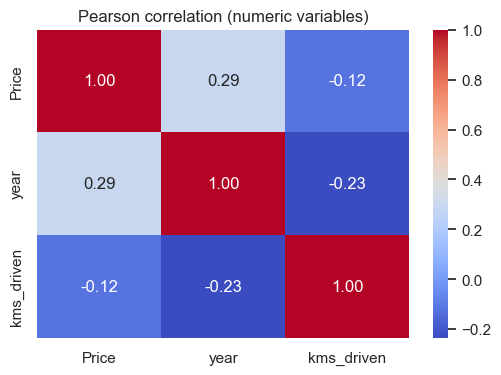


Spearman correlation:
               Price      year  kms_driven
Price       1.000000  0.538141   -0.252006
year        0.538141  1.000000   -0.362768
kms_driven -0.252006 -0.362768    1.000000


In [19]:
# Imports needed for statistical tests and plotting
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import seaborn as sns
sns.set_theme()

# Short numeric overview
num_cols = ['Price','year','kms_driven']
display(car[num_cols].describe())

# Correlation (Pearson) and Spearman (rank)
corr = car[num_cols].corr(method='pearson')
print('\nPearson correlation:')
print(corr)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson correlation (numeric variables)')
plt.show()

spearman = car[num_cols].corr(method='spearman')
print('\nSpearman correlation:')
print(spearman)

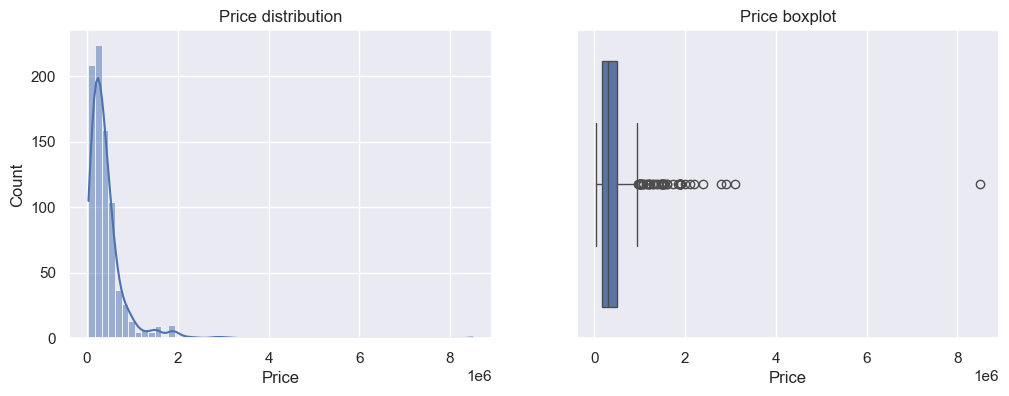

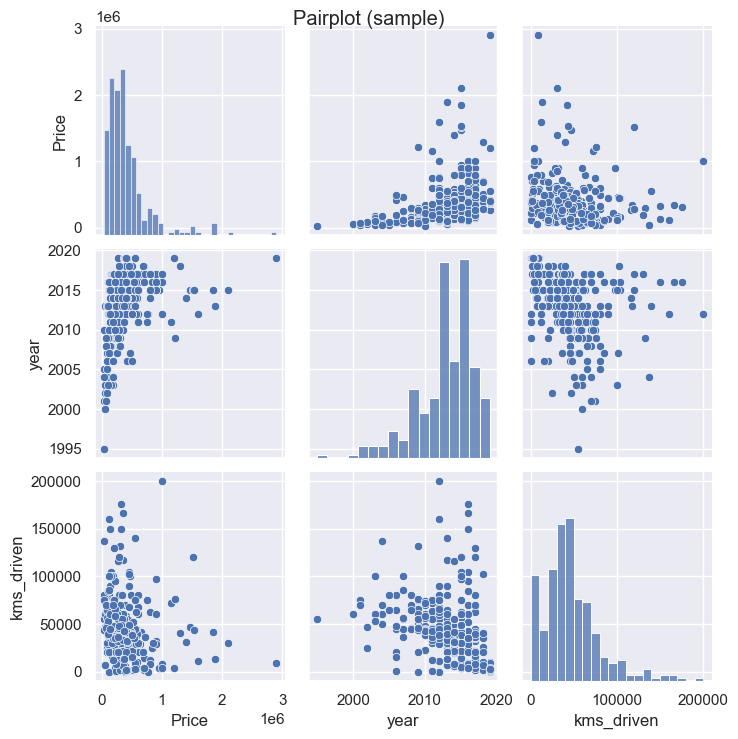

In [20]:
# Distribution plots for Price and simple diagnostics
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(car['Price'], kde=True)
plt.title('Price distribution')
plt.subplot(1,2,2)
sns.boxplot(x=car['Price'])
plt.title('Price boxplot')
plt.show()

# Pairplot on a sample (limit size for speed)
sample = car[['Price','year','kms_driven']].sample(min(300, len(car)), random_state=1)
sns.pairplot(sample)
plt.suptitle('Pairplot (sample)')
plt.show()

In [21]:
# ANOVA: test whether mean Price differs across companies.
# Group companies with few observations into 'Other' to make tests stable.
company_counts = car['company'].value_counts()
threshold = 20
small_companies = company_counts[company_counts < threshold].index
car['company_grouped'] = car['company'].where(~car['company'].isin(small_companies), 'Other')
print(car['company_grouped'].value_counts())

model = ols('Price ~ C(company_grouped)', data=car).fit()
anova_results = anova_lm(model)
print('ANOVA results for Price by company_grouped:')
print(anova_results)

company_grouped
Maruti       221
Hyundai      139
Other        100
Mahindra      98
Tata          65
Honda         60
Toyota        36
Chevrolet     34
Renault       33
Ford          30
Name: count, dtype: int64
ANOVA results for Price by company_grouped:
                       df        sum_sq       mean_sq          F        PR(>F)
C(company_grouped)    9.0  3.262722e+13  3.625247e+12  19.299537  1.961894e-29
Residual            806.0  1.514000e+14  1.878412e+11        NaN           NaN


Levene test: stat=14.010, p=0.0000 (p>0.05 => variances similar)
Shapiro-Wilk on residuals: stat=0.525, p=0.0000 (p>0.05 => approx normal)


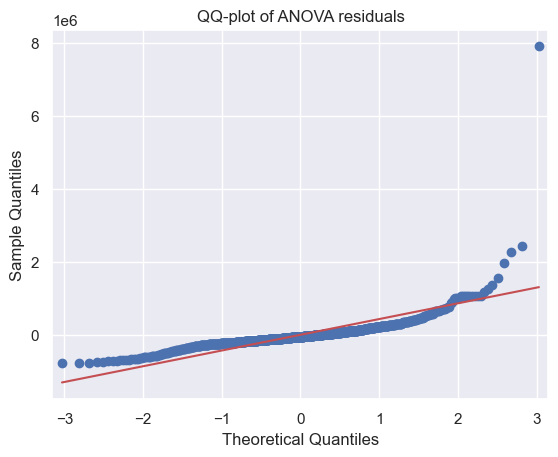

Eta-squared = 0.177 (0.01 small, 0.06 medium, 0.14 large)


In [22]:
# --- Assumption checks & effect size for ANOVA
from scipy.stats import levene, shapiro
# Prepare groups used in ANOVA (company_grouped)
groups = [g['Price'].values for _, g in car.groupby('company_grouped')]
stat_levene, p_levene = levene(*groups)
print(f'Levene test: stat={stat_levene:.3f}, p={p_levene:.4f} (p>0.05 => variances similar)')
# Residual normality (Shapiro on residuals; sample if large)
resid = model.resid
stat_sh, p_sh = shapiro(resid.sample(min(len(resid), 500), random_state=0))
print(f'Shapiro-Wilk on residuals: stat={stat_sh:.3f}, p={p_sh:.4f} (p>0.05 => approx normal)')
# QQ-plot of residuals
import statsmodels.api as sm
sm.qqplot(resid, line='s')
plt.title('QQ-plot of ANOVA residuals')
plt.show()
# Effect size (eta-squared)
ss_between = anova_results['sum_sq'][0]
ss_within  = anova_results['sum_sq'][1]
ss_total = ss_between + ss_within
eta2 = ss_between / ss_total
print(f'Eta-squared = {eta2:.3f} (0.01 small, 0.06 medium, 0.14 large)')

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1   group2    meandiff   p-adj     lower        upper     reject
-----------------------------------------------------------------------
Chevrolet     Ford  277714.6353 0.2396  -66716.6761  622145.9467  False
Chevrolet    Honda   145547.652 0.8648 -149615.1111   440710.415  False
Chevrolet  Hyundai  116317.5195 0.9264 -146763.1371   379398.176  False
Chevrolet Mahindra  401351.4292 0.0002  127668.8252  675034.0332   True
Chevrolet   Maruti   67752.2873 0.9978 -185554.7287  321059.3034  False
Chevrolet    Other  634633.4153    0.0  361656.6616   907610.169   True
Chevrolet  Renault   258427.008 0.3034  -77584.1482  594438.1642  False
Chevrolet     Tata   -1145.9724    1.0 -292173.5769  289881.6321  False
Chevrolet   Toyota  322359.0131 0.0601   -6470.6861  651188.7123  False
     Ford    Honda -132166.9833 0.9378 -439633.4282  175299.4615  False
     Ford  Hyundai -161397.1158 0.7029 -438211.1145  115416.8829

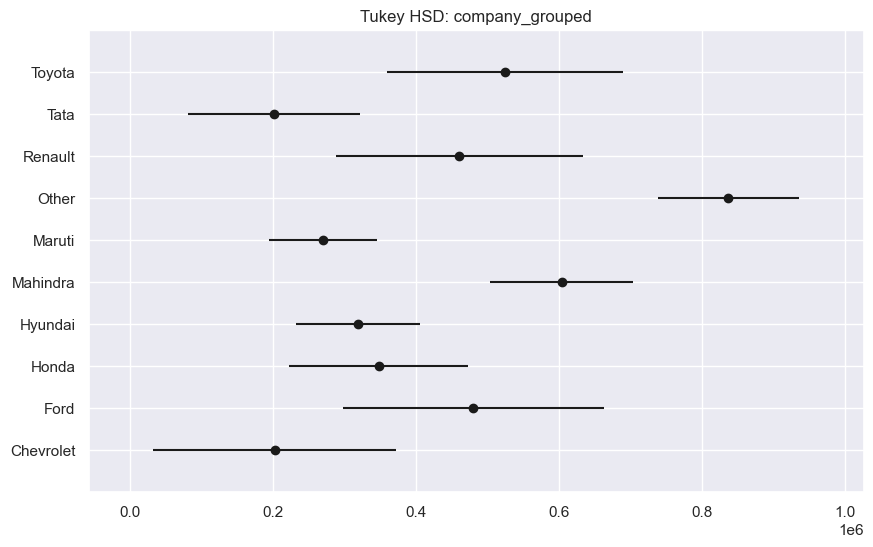

In [23]:
# If ANOVA is significant, follow up with Tukey HSD to find differing pairs
tukey = pairwise_tukeyhsd(endog=car['Price'], groups=car['company_grouped'], alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous(figsize=(10,6))
plt.title('Tukey HSD: company_grouped')
plt.show()

In [24]:
# ANOVA for fuel_type (few levels)
model_fuel = ols('Price ~ C(fuel_type)', data=car).fit()
print('ANOVA results for Price by fuel_type:')
print(anova_lm(model_fuel))
# Tukey for fuel_type
tukey_fuel = pairwise_tukeyhsd(endog=car['Price'], groups=car['fuel_type'], alpha=0.05)
print(tukey_fuel.summary())

ANOVA results for Price by fuel_type:
                 df        sum_sq       mean_sq          F        PR(>F)
C(fuel_type)    2.0  7.082160e+12  3.541080e+12  16.270013  1.179686e-07
Residual      813.0  1.769450e+14  2.176446e+11        NaN           NaN
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj      lower        upper    reject
------------------------------------------------------------------
Diesel    LPG  -304849.386 0.6267 -1081419.7456 471720.9735  False
Diesel Petrol -185667.8183    0.0  -262557.8895 -108777.747   True
   LPG Petrol  119181.5678 0.9309   -657192.361 895555.4965  False
------------------------------------------------------------------


In [25]:
# Chi-square test of independence between grouped company and fuel_type
cont = pd.crosstab(car['company_grouped'], car['fuel_type'])
print('Contingency table (company_grouped x fuel_type)')
display(cont)
chi2, p, dof, expected = chi2_contingency(cont)
print(f'Chi-square: {chi2:.2f}, p-value: {p:.4f}, dof: {dof}')

# Note: if expected counts are small in many cells, interpret chi-square with caution.

Contingency table (company_grouped x fuel_type)


fuel_type,Diesel,LPG,Petrol
company_grouped,,,
Chevrolet,21,0,13
Ford,19,0,11
Honda,15,0,45
Hyundai,27,0,112
Mahindra,95,0,3
Maruti,60,2,159
Other,54,0,46
Renault,25,0,8
Tata,50,0,15


Chi-square: 234.89, p-value: 0.0000, dof: 18


In [26]:
car.to_csv('Cleaned_Car_data.csv')

In [27]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             816 non-null    object
 1   company          816 non-null    object
 2   year             816 non-null    int64 
 3   Price            816 non-null    int64 
 4   kms_driven       816 non-null    int64 
 5   fuel_type        816 non-null    object
 6   company_grouped  816 non-null    object
dtypes: int64(3), object(4)
memory usage: 44.8+ KB


In [28]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type,company_grouped
count,816,816,816.000000,8.160000e+02,816.000000,816,816
unique,254,25,NaN,NaN,NaN,3,10
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol,Maruti
freq,51,221,NaN,NaN,NaN,428,221
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN,NaN


In [29]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price

In [30]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [31]:
import seaborn as sns

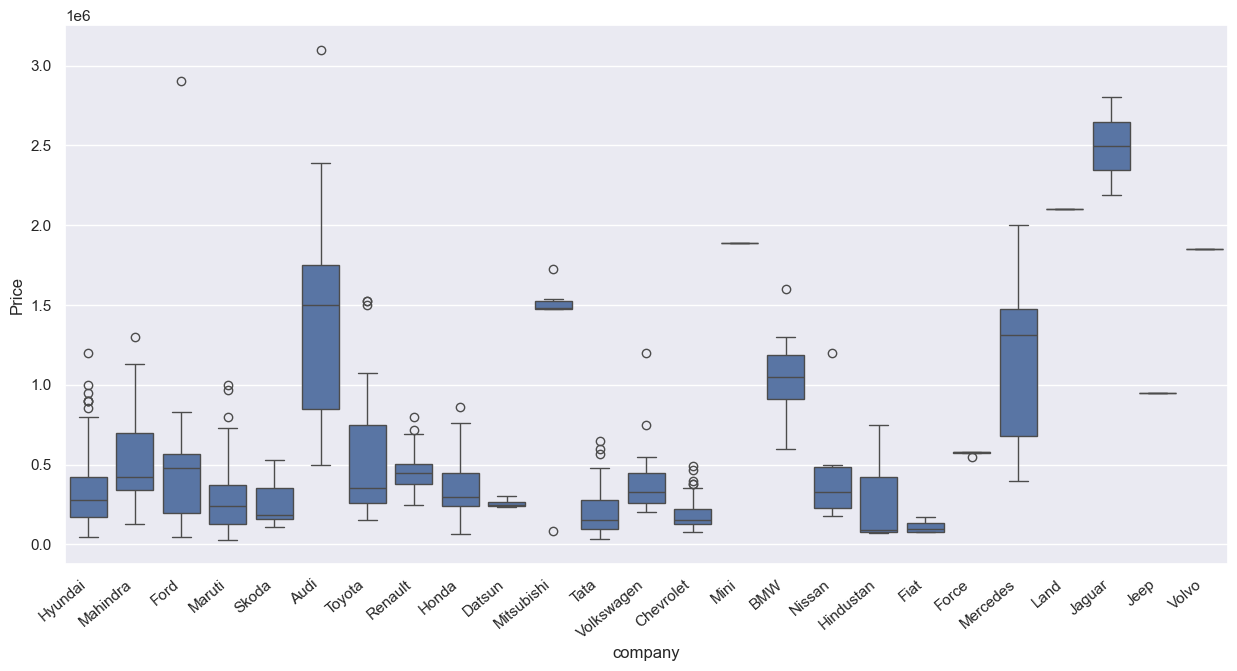

In [32]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

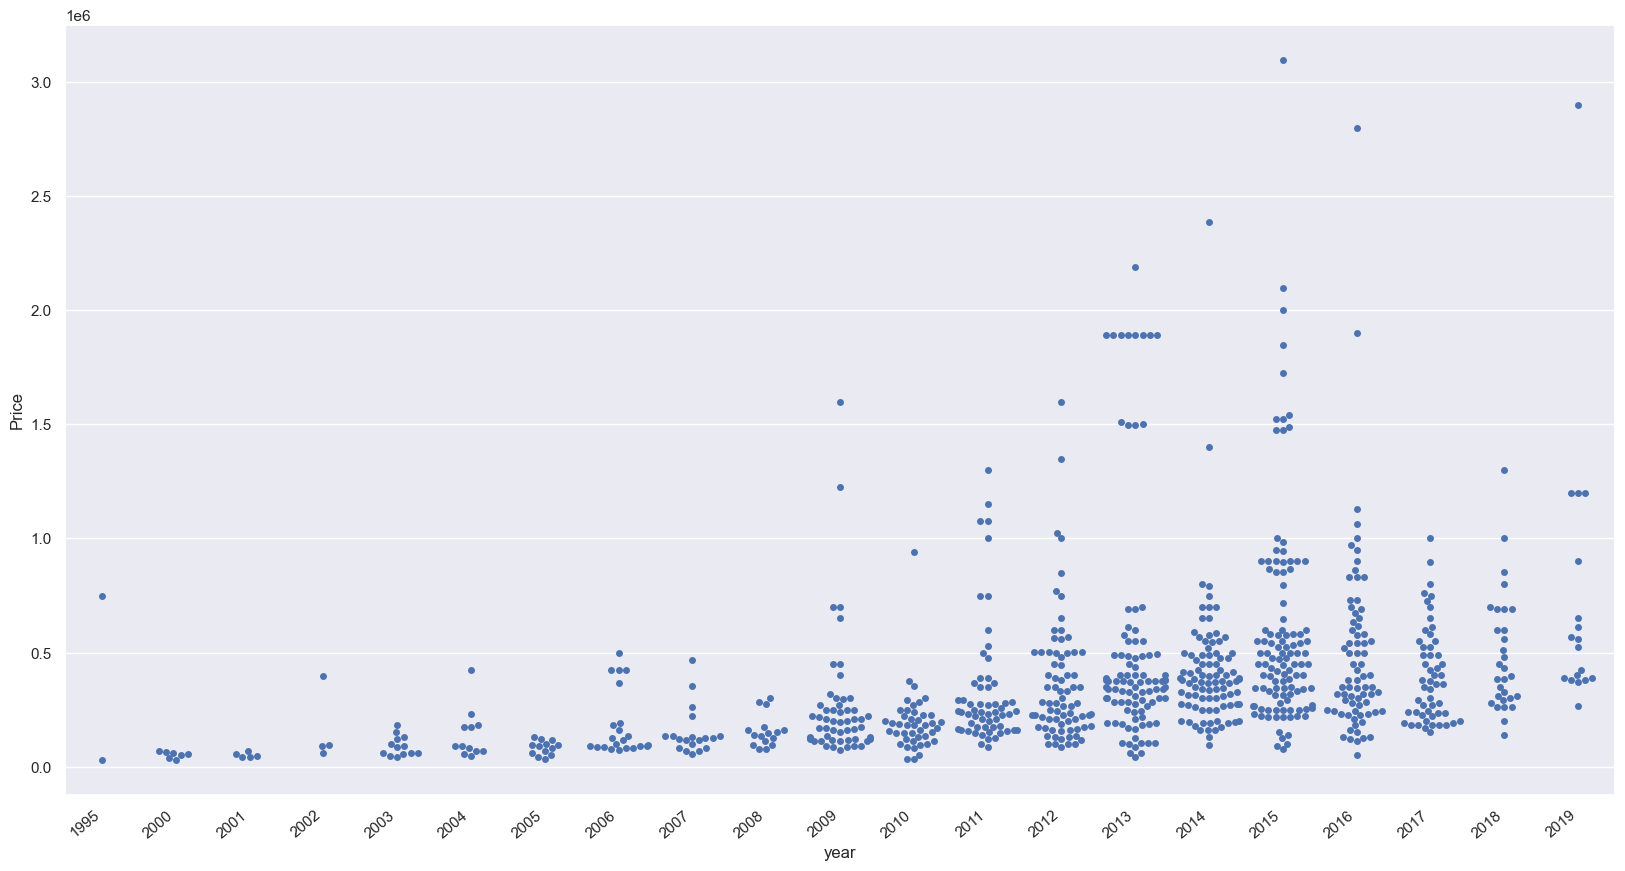

In [33]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

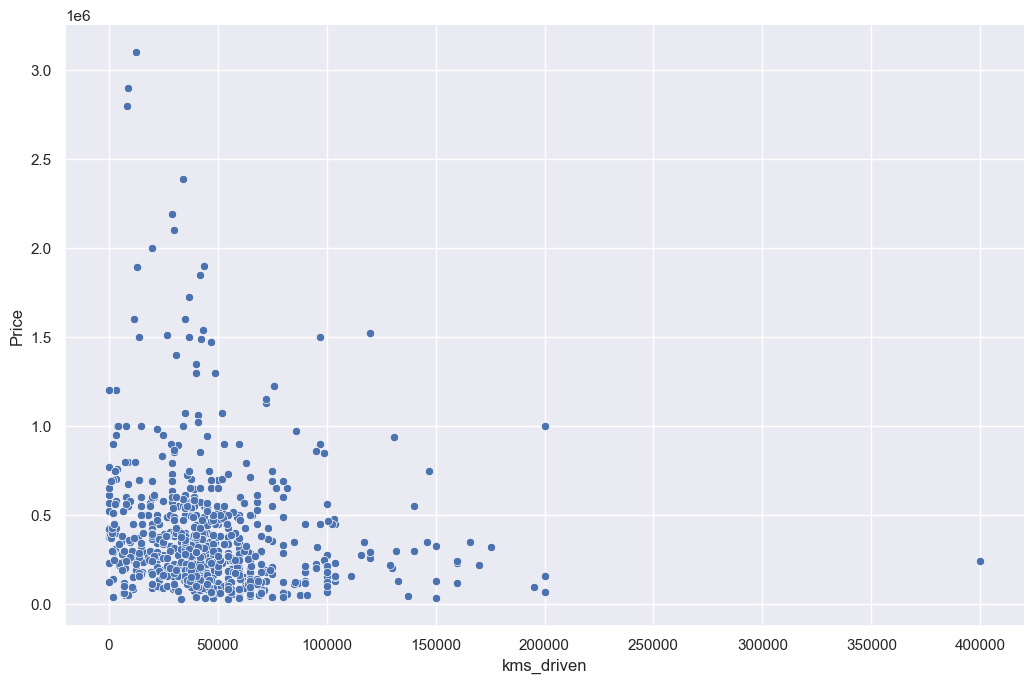

In [34]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

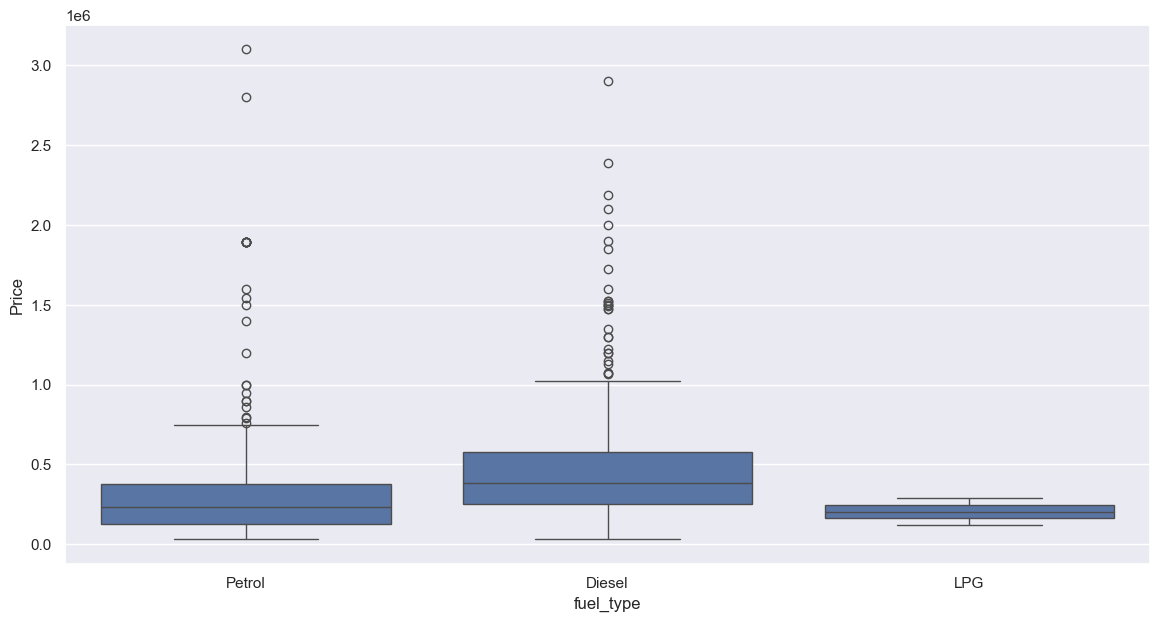

In [35]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

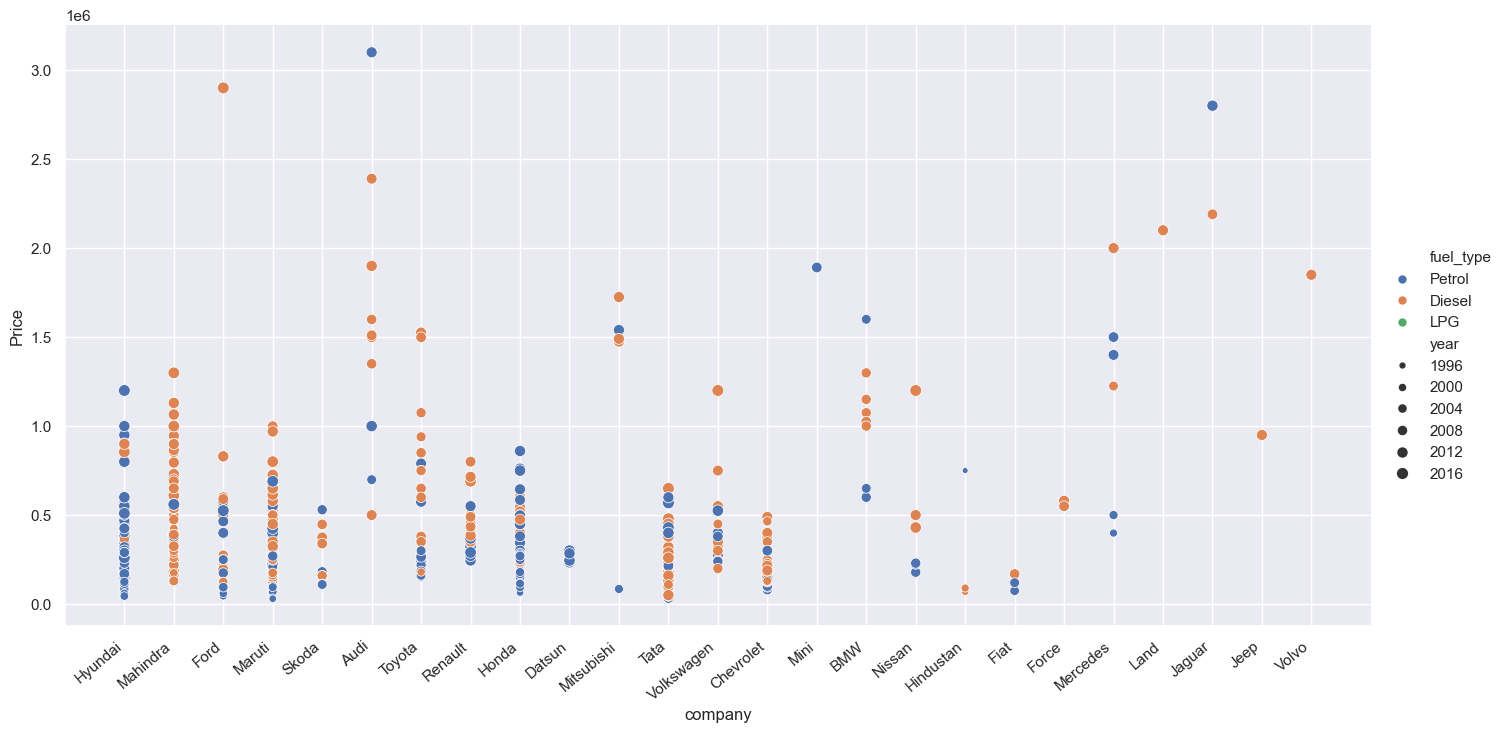

In [36]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [37]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [38]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [39]:
y.shape

(815,)

### Applying Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [43]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['name','company','fuel_type']])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


#### Creating a column transformer to transform categorical columns

In [44]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [45]:
lr=LinearRegression()

#### Making a pipeline

In [46]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [47]:
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [49]:
r2_score(y_test,y_pred)

0.5879974517144245

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [50]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [51]:
np.argmax(scores)

np.int64(302)

In [52]:
scores[np.argmax(scores)]

0.8991157554877304

#### The best model is found at a certain random state 

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991157554877304

In [54]:
import pickle
import json

# save trained model
with open("quikr_price_model.pkl", "wb") as f:
    pickle.dump(pipe, f)

# save feature columns (X from your notebook)
with open("quikr_columns.json", "w") as f:
    json.dump(list(X.columns), f)


In [55]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.3272301])

In [56]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Audi A8','Audi',2017,4000,'Petrol']).reshape(1,5)))

array([1754319.77475397])

In [57]:
# Save key analysis outputs to a text file for easy sharing
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency, levene, shapiro
import pandas as pd

out_path = 'analysis_results.txt'

with open(out_path, 'w', encoding='utf-8') as f:
    def writ(x=''):
        f.write(str(x) + '\n')

    try:
        # --- Correlations
        num_cols = ['Price', 'year', 'kms_driven']
        corr = car[num_cols].corr(method='pearson')
        spearman = car[num_cols].corr(method='spearman')

        writ('Pearson correlation:')
        writ(corr.to_string())
        writ('')
        writ('Spearman correlation:')
        writ(spearman.to_string())
        writ('')

        # --- ANOVA for company_grouped (group rare companies into 'Other')
        company_counts = car['company'].value_counts()
        threshold = 20
        small_companies = company_counts[company_counts < threshold].index
        car['company_grouped'] = car['company'].where(~car['company'].isin(small_companies), 'Other')

        model = ols('Price ~ C(company_grouped)', data=car).fit()
        anova_results = anova_lm(model)

        writ('ANOVA results for Price by company_grouped:')
        writ(anova_results.to_string())
        writ('')

        # Effect size (eta-squared)
        try:
            ss_between = anova_results['sum_sq'][0]
            ss_within = anova_results['sum_sq'][1]
            eta2 = ss_between / (ss_between + ss_within)
            writ(f'Eta-squared = {eta2:.3f} (0.01 small, 0.06 medium, 0.14 large)')
        except Exception as e:
            writ('Could not compute eta-squared: ' + str(e))
        writ('')

        # --- Assumption checks
        try:
            groups = [g['Price'].values for _, g in car.groupby('company_grouped')]
            stat_levene, p_levene = levene(*groups)
            writ(f'Levene test (homogeneity of variances): stat={stat_levene:.3f}, p={p_levene:.4f}')
        except Exception as e:
            writ('Levene test failed: ' + str(e))

        try:
            resid = model.resid
            stat_sh, p_sh = shapiro(resid.sample(min(len(resid), 500), random_state=0))
            writ(f'Shapiro-Wilk on residuals: stat={stat_sh:.3f}, p={p_sh:.4f} (p>0.05 => approx normal)')
        except Exception as e:
            writ('Shapiro-Wilk test failed: ' + str(e))
        writ('')

        # --- Tukey HSD for companies (post-hoc)
        try:
            tukey = pairwise_tukeyhsd(endog=car['Price'], groups=car['company_grouped'], alpha=0.05)
            writ('Tukey HSD (company_grouped) summary:')
            writ(str(tukey.summary()))
        except Exception as e:
            writ('Tukey HSD (company_grouped) failed: ' + str(e))
        writ('')

        # --- ANOVA and Tukey for fuel_type
        try:
            model_fuel = ols('Price ~ C(fuel_type)', data=car).fit()
            anova_fuel = anova_lm(model_fuel)
            writ('ANOVA results for Price by fuel_type:')
            writ(anova_fuel.to_string())

            tukey_fuel = pairwise_tukeyhsd(endog=car['Price'], groups=car['fuel_type'], alpha=0.05)
            writ('Tukey HSD (fuel_type) summary:')
            writ(str(tukey_fuel.summary()))
        except Exception as e:
            writ('ANOVA/Tukey for fuel_type failed: ' + str(e))
        writ('')

        # --- Chi-square test between company_grouped and fuel_type
        try:
            cont = pd.crosstab(car['company_grouped'], car['fuel_type'])
            writ('Contingency table (company_grouped x fuel_type):')
            writ(cont.to_string())
            chi2, p, dof, expected = chi2_contingency(cont)
            writ(f'Chi-square: {chi2:.2f}, p-value: {p:.4f}, dof: {dof}')
            try:
                exp_df = pd.DataFrame(expected, index=cont.index, columns=cont.columns)
                writ('Expected counts:')
                writ(exp_df.to_string())
            except Exception as e:
                writ('Could not format expected counts: ' + str(e))
        except Exception as e:
            writ('Chi-square test failed: ' + str(e))

    except Exception as err:
        writ('Error while computing outputs: ' + str(err))

print(f'Wrote analysis results to {out_path}')

Wrote analysis results to analysis_results.txt
